# 유가증권 수익율 계산 

In [1]:
import pandas as pd
import numpy as np
import pandas_datareader as pdr
import FinanceDataReader as fdr
import seaborn as sns
from matplotlib import dates as mdates
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings(action='ignore')

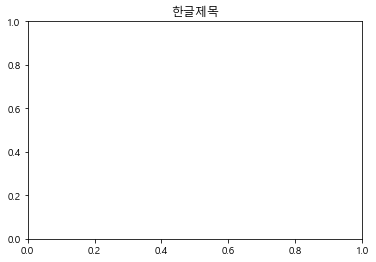

In [2]:
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.title('한글제목')
plt.show()

In [3]:
def myplot(df, nrows=5,  kind='line', title='제목', labels=False):  
    if nrows > 0:
        print(df.head(nrows))
    else:
        print(df.tail(nrows))
    
    if labels:
        cols = df.columns
        for i, col in enumerate(cols):
            df[col].plot(label=labels[i], kind=kind)
    else :
        df.plot(kind=kind)
    
    plt.title(title)
    plt.legend()
    plt.show()

In [4]:
def myplotmix(df1, df2, y1='ylabel-1', y2='ylabel-2', kind1='bar', kind2='line', title='제목',  nrows1=5, nrows2=5,  labels=False):  
    ytl=['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w']

    if nrows1 > 0:
        print(df1.head(nrows1))
    elif nrows1 < 0:
        print(df1.tail(nrows1))
    if nrows2 > 0:
        print(df2.head(nrows2))
    else:
        print(df2.tail(nrows2))
    fig, ax1 = plt.subplots(figsize=(8, 4))
    ax2=ax1.twinx()
    if kind1 == 'line':
        df1.plot(kind=kind1, ax=ax2, marker='d',color='#e35f62')  #color='y', 
        df2.plot(kind=kind2, ax=ax1)  #bar
    else:
        df1.plot(kind=kind1, ax=ax1,color='#bcbd22')
        df2.plot(kind=kind2, ax=ax2) #color='y',
        
    # df['date'] = df['date'].dt.strftime('%Y-%m-%d')
    # ax1.set_xticklabels(df['date'])    
    ax1.yaxis.tick_right()
    ax2.yaxis.tick_left()
    ax1.set_ylabel(y1) #, color='red')
    ax2.set_ylabel(y2) #, color='red')
    ax1.legend(loc=1)
    ax2.legend(loc=2)
    plt.title(title)
    ax1.grid(False)
    ax2.grid(False)
    plt.show()

In [5]:
def codefind(name):
    krx = fdr.StockListing('KRX')
    search = list(krx['Name'])
    for i in range(len(krx)):
        if (search[i]==name):
            print(krx['Symbol'][i])
            return
codefind('카카오')        

035720


## yahoo finance를 이용한 삼성전자 주식 가져오기

In [6]:
df_ss = pdr.get_data_yahoo('005930.KS', '2018-01-01', '2019-12-31')


In [7]:
df_ss.info()
df_ss.head()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 487 entries, 2018-01-03 to 2019-12-30
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       487 non-null    float64
 1   Low        487 non-null    float64
 2   Open       487 non-null    float64
 3   Close      487 non-null    float64
 4   Volume     487 non-null    float64
 5   Adj Close  487 non-null    float64
dtypes: float64(6)
memory usage: 26.6 KB


,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2018-01-03,52560.0,51420.0,52540.0,51620.0,10013500.0,46235.468750
2018-01-04,52180.0,50640.0,52120.0,51080.0,11695450.0,45751.796875
2018-01-05,52120.0,51200.0,51300.0,52120.0,9481150.0,46683.312500
2018-01-08,52520.0,51500.0,52400.0,52020.0,8383650.0,46593.753906
2018-01-09,51720.0,49980.0,51460.0,50400.0,18013600.0,45142.734375


In [8]:
df_ss.isna().sum()

High         0
Low          0
Open         0
Close        0
Volume       0
Adj Close    0
dtype: int64

### 종가 그데로 출력하면 다른 상품 가격과 비교하기 힘들다

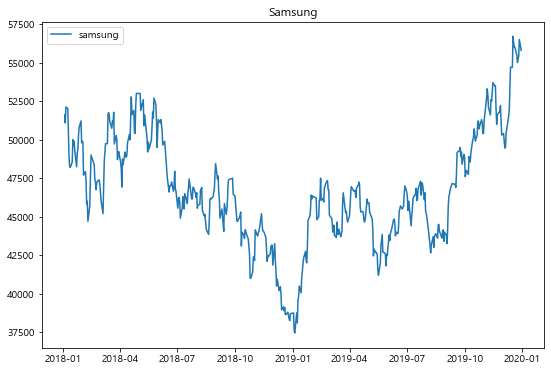

In [9]:
plt.figure(figsize=(9, 6))
# plt.subplot(2, 1, 1)
plt.title('Samsung')
plt.plot(df_ss.index, df_ss['Close'], label='samsung')
plt.legend()


## 일간 변동가 / 변동률

### 이동평균선(이평선)
* N일의 주가지수의 평균 변동률
* 이동평균선 (N일 동안의 주가의 평균 변동률을 이은 선)

In [10]:
def 이동편균선(day=1):
    df_ss['dayline_'+str(day)] = df_ss['Close'].rolling(day).mean()

In [11]:
df_ss.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2018-01-03,52560.0,51420.0,52540.0,51620.0,10013500.0,46235.468750
2018-01-04,52180.0,50640.0,52120.0,51080.0,11695450.0,45751.796875
2018-01-05,52120.0,51200.0,51300.0,52120.0,9481150.0,46683.312500
2018-01-08,52520.0,51500.0,52400.0,52020.0,8383650.0,46593.753906
2018-01-09,51720.0,49980.0,51460.0,50400.0,18013600.0,45142.734375


              Close  dayline_5  dayline_10
Date                                      
2018-01-03  51620.0        NaN         NaN
2018-01-04  51080.0        NaN         NaN
2018-01-05  52120.0        NaN         NaN
2018-01-08  52020.0        NaN         NaN
2018-01-09  50400.0    51448.0         NaN


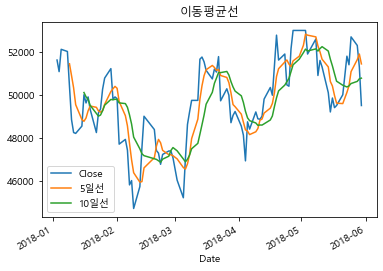

In [12]:
이동편균선(10)
이동편균선(5)
# myplot(df_ss[['Close','dayline_5','dayline_10']], title='이동평균선', labels=['Close','5일선','10일선'])
myplot(df_ss.iloc[:100][['Close','dayline_5','dayline_10']], title='이동평균선', labels=['Close','5일선','10일선'])

* 이평선은 변동성이 완화된 것처럼 보인다

### 수익률 구하기 
* 가격의 변동을 보고 오늘 기준으로 N일과 비교해서 가감산 금액 구하기

In [13]:
def 변동지수_가격(day=1):
    df_ss['chg_'+str(day)] = df_ss['Close'].pct_change(periods=day) * 100     

In [14]:
변동지수_가격(3)
df_ss.head()
# myplot(df_ss.iloc[:100][['Close']], title='변동가(지수)---N일 이익률', labels=['Close'])

,High,Low,Open,Close,Volume,Adj Close,dayline_10,dayline_5,chg_3
Date,,,,,,,,,
2018-01-03,52560.0,51420.0,52540.0,51620.0,10013500.0,46235.468750,NaN,NaN,NaN
2018-01-04,52180.0,50640.0,52120.0,51080.0,11695450.0,45751.796875,NaN,NaN,NaN
2018-01-05,52120.0,51200.0,51300.0,52120.0,9481150.0,46683.312500,NaN,NaN,NaN
2018-01-08,52520.0,51500.0,52400.0,52020.0,8383650.0,46593.753906,NaN,NaN,0.774893
2018-01-09,51720.0,49980.0,51460.0,50400.0,18013600.0,45142.734375,NaN,51448.0,-1.331245


In [15]:
# df_ss['ssv'] = df_ss['Close'].pct_change(periods=1) * 100 
# df_ss = df_ss.fillna(0)
# df_ss.head()
# # df_ss['일별등락률'].cumsum()
# df_ss.columns 

### 보유기간 수익률(holding period return)
* 투자자산을 보유한 기간 동안 몇 %의 수익률을 올렸는가를 측정하는 것으로, 단순한 성과비교용으로 사용
* 보유기간수익률(%) = {[기말의 투자자산(매도가) ÷ 기초의 투자자산(매수가)] - 1} X 100

In [16]:
df_ss.index.max(), df_ss.index.min(), 

(Timestamp('2019-12-30 00:00:00'), Timestamp('2018-01-03 00:00:00'))

In [17]:
ago = int(df_ss.iloc[0:1,]['Close'])
# ago = df_ss.iloc[0]['Close']
print(ago)
today = int(df_ss.iloc[252:253]['Close'])   #index.min()
# today = df_ss.iloc[252]['Close']   #index.min()
print(today)
보유기간수익률 = ((ago / today) - 1) * 100
print(보유기간수익률)

51620
41450
24.53558504221953


### 연간 보유기간 수익률 - 기하평균
* 연간 보유기간수익률(%) = {[(최종투자자산 ÷ 최초투자자산)^1/n] - 1} X 100*n : 년수 (ex 2년 6개월이라면 n=2.5 )


In [18]:
n = 1
연간보유기간수익률 = (pow((today/ ago),1/n) - 1) * 100
print(연간보유기간수익률)

-19.701666020922126


### 기대수익률 - 기하평균
* 호황%30 보통40% 불황30
* 수익률% 20 8 -4
* 12000 10800 9600
* = 0.3 X 0.2 + 0.4 X 0.08 + 0.3 X (-0.04) = 0.08 = 8%

In [19]:
price = [20/100, 8/100, -4/100]
eco   = [30/100 , 40/100 , 30/100]
기대수익률 = (eco[0]*price[0])  + (eco[1]*price[1])  + (eco[2]*price[2])
기대수익률

0.08

## 가중평균 수익률

In [20]:
init_price = np.array([4000,4000,2000])
year_earing_rate = np.array([0.25, 0.05,0.1 ])

In [21]:
res = np.dot(init_price, year_earing_rate.reshape(-1,1))
res

array([1400.])

In [22]:
price = [12000, 10800, 9600]
price_sum = np.array(price).sum()

price_weight = [12000/price_sum, 10800/price_sum, 9600/price_sum]
eco_rate = [30/100 , 40/100 , 30/100]


price_weight = np.array(price_weight)
eco_rate = np.array(eco_rate).reshape(-1,1)
기대수익률1 = np.dot(price_weight, eco_rate)

기대수익률2 = (eco_rate[0]*price_weight[0])  + (eco_rate[1]*price_weight[1])  + (eco_rate[2]*price_weight[2])
print(기대수익률1, 기대수익률2)
        

[0.33333333] [0.33333333]


## 변동지수_가격

In [23]:
last_day = df_ss['Close'].shift(1)
today = df_ss['Close']

df_ss['var_daily_price'] = today - last_day                      # 변동가
df_ss['var_daily_ratio'] = ((today - last_day)/last_day) *100    # 변동율

df_ss.head()


,High,Low,Open,Close,Volume,Adj Close,dayline_10,dayline_5,chg_3,var_daily_price,var_daily_ratio
Date,,,,,,,,,,,
2018-01-03,52560.0,51420.0,52540.0,51620.0,10013500.0,46235.468750,NaN,NaN,NaN,NaN,NaN
2018-01-04,52180.0,50640.0,52120.0,51080.0,11695450.0,45751.796875,NaN,NaN,NaN,-540.0,-1.046106
2018-01-05,52120.0,51200.0,51300.0,52120.0,9481150.0,46683.312500,NaN,NaN,NaN,1040.0,2.036022
2018-01-08,52520.0,51500.0,52400.0,52020.0,8383650.0,46593.753906,NaN,NaN,0.774893,-100.0,-0.191865
2018-01-09,51720.0,49980.0,51460.0,50400.0,18013600.0,45142.734375,NaN,51448.0,-1.331245,-1620.0,-3.114187


## 변동계수
* 서로 다른 두 자산이 비슷하게 움직이는지 다른 방향으로 움직이는지 알려주는 지표
* 변동계수 = 𝜎(자산수익률의 표준편차) / 자산의 평균(기대)수익률

In [24]:
df_ss.head()

,High,Low,Open,Close,Volume,Adj Close,dayline_10,dayline_5,chg_3,var_daily_price,var_daily_ratio
Date,,,,,,,,,,,
2018-01-03,52560.0,51420.0,52540.0,51620.0,10013500.0,46235.468750,NaN,NaN,NaN,NaN,NaN
2018-01-04,52180.0,50640.0,52120.0,51080.0,11695450.0,45751.796875,NaN,NaN,NaN,-540.0,-1.046106
2018-01-05,52120.0,51200.0,51300.0,52120.0,9481150.0,46683.312500,NaN,NaN,NaN,1040.0,2.036022
2018-01-08,52520.0,51500.0,52400.0,52020.0,8383650.0,46593.753906,NaN,NaN,0.774893,-100.0,-0.191865
2018-01-09,51720.0,49980.0,51460.0,50400.0,18013600.0,45142.734375,NaN,51448.0,-1.331245,-1620.0,-3.114187


In [25]:
변동계수 = df_ss['var_daily_ratio'].std() / df_ss['var_daily_ratio'].mean()
변동계수

55.51350411060779

               High       Low      Open     Close    Volume  Adj Close  \
Close      0.992770  0.994379  0.985458  1.000000  0.067317   0.970953   
Low        0.993544  1.000000  0.993830  0.994379  0.050855   0.967650   
High       1.000000  0.993544  0.993159  0.992770  0.115784   0.959681   
Open       0.993159  0.993830  1.000000  0.985458  0.076468   0.954972   
dayline_5  0.980424  0.978770  0.978701  0.973042  0.094626   0.938656   

           dayline_10  dayline_5     chg_3  var_daily_price  var_daily_ratio  
Close        0.940026   0.973042  0.217413         0.125353         0.121939  
Low          0.947468   0.978770  0.176550         0.058933         0.055715  
High         0.950432   0.980424  0.164408         0.053057         0.050811  
Open         0.946777   0.978701  0.149569        -0.000368        -0.002333  
dayline_5    0.981051   1.000000 -0.002072        -0.045730        -0.048117  


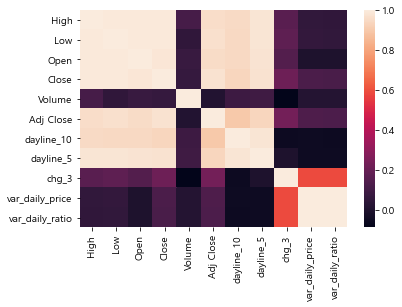

In [26]:
import seaborn as sns
sns.heatmap(df_ss.corr())
print(df_ss.corr().sort_values(by='Close', ascending=False)[:5])

In [27]:
df_ss.head()

,High,Low,Open,Close,Volume,Adj Close,dayline_10,dayline_5,chg_3,var_daily_price,var_daily_ratio
Date,,,,,,,,,,,
2018-01-03,52560.0,51420.0,52540.0,51620.0,10013500.0,46235.468750,NaN,NaN,NaN,NaN,NaN
2018-01-04,52180.0,50640.0,52120.0,51080.0,11695450.0,45751.796875,NaN,NaN,NaN,-540.0,-1.046106
2018-01-05,52120.0,51200.0,51300.0,52120.0,9481150.0,46683.312500,NaN,NaN,NaN,1040.0,2.036022
2018-01-08,52520.0,51500.0,52400.0,52020.0,8383650.0,46593.753906,NaN,NaN,0.774893,-100.0,-0.191865
2018-01-09,51720.0,49980.0,51460.0,50400.0,18013600.0,45142.734375,NaN,51448.0,-1.331245,-1620.0,-3.114187


## NN 모델 예측

* 계산은 수익률은 예측모델하라고 계산한게 아니라 투자전략 세우라고 있는것이다
* 추가 지표가 별도로 없어서 지표라 생각하고 NN 학습 시도

In [28]:
# df_ss = df_ss.fillna(0)
df_ss.dropna(axis=0, inplace=True)

In [29]:
df_ss.head()

,High,Low,Open,Close,Volume,Adj Close,dayline_10,dayline_5,chg_3,var_daily_price,var_daily_ratio
Date,,,,,,,,,,,
2018-01-16,50140.0,48620.0,48760.0,50000.0,20389650.0,44784.453125,50106.0,48764.0,3.648425,1460.0,3.007829
2018-01-17,50020.0,49060.0,50020.0,49620.0,11053050.0,44444.089844,49906.0,48920.0,2.946058,-380.0,-0.760000
2018-01-18,50640.0,49820.0,50020.0,49900.0,14848850.0,44694.882812,49788.0,49252.0,2.801813,280.0,0.564289
2018-01-19,50380.0,49040.0,50380.0,49320.0,9219950.0,44175.386719,49508.0,49476.0,-1.360000,-580.0,-1.162325
2018-01-22,48680.0,47960.0,48640.0,48240.0,12520900.0,43208.042969,49130.0,49416.0,-2.781137,-1080.0,-2.189781


In [30]:
df_ss.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 478 entries, 2018-01-16 to 2019-12-30
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   High             478 non-null    float64
 1   Low              478 non-null    float64
 2   Open             478 non-null    float64
 3   Close            478 non-null    float64
 4   Volume           478 non-null    float64
 5   Adj Close        478 non-null    float64
 6   dayline_10       478 non-null    float64
 7   dayline_5        478 non-null    float64
 8   chg_3            478 non-null    float64
 9   var_daily_price  478 non-null    float64
 10  var_daily_ratio  478 non-null    float64
dtypes: float64(11)
memory usage: 44.8 KB


In [31]:
df_ss.drop(['dayline_10','Adj Close'], axis=1, inplace=True)

In [32]:
df_ss.head()

,High,Low,Open,Close,Volume,dayline_5,chg_3,var_daily_price,var_daily_ratio
Date,,,,,,,,,
2018-01-16,50140.0,48620.0,48760.0,50000.0,20389650.0,48764.0,3.648425,1460.0,3.007829
2018-01-17,50020.0,49060.0,50020.0,49620.0,11053050.0,48920.0,2.946058,-380.0,-0.760000
2018-01-18,50640.0,49820.0,50020.0,49900.0,14848850.0,49252.0,2.801813,280.0,0.564289
2018-01-19,50380.0,49040.0,50380.0,49320.0,9219950.0,49476.0,-1.360000,-580.0,-1.162325
2018-01-22,48680.0,47960.0,48640.0,48240.0,12520900.0,49416.0,-2.781137,-1080.0,-2.189781


In [33]:
split_size = int(df_ss.shape[0]*0.8)  #382
train = df_ss.iloc[:split_size]  #[:382]
test = df_ss.iloc[split_size:]   #[382:]
print(train.shape, test.shape)

(382, 9) (96, 9)


<AxesSubplot:xlabel='Date'>

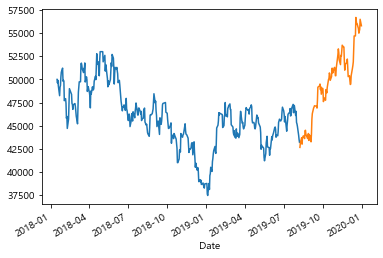

In [34]:
train['Close'].plot()
test['Close'].plot()

In [35]:
df_ss.head()

,High,Low,Open,Close,Volume,dayline_5,chg_3,var_daily_price,var_daily_ratio
Date,,,,,,,,,
2018-01-16,50140.0,48620.0,48760.0,50000.0,20389650.0,48764.0,3.648425,1460.0,3.007829
2018-01-17,50020.0,49060.0,50020.0,49620.0,11053050.0,48920.0,2.946058,-380.0,-0.760000
2018-01-18,50640.0,49820.0,50020.0,49900.0,14848850.0,49252.0,2.801813,280.0,0.564289
2018-01-19,50380.0,49040.0,50380.0,49320.0,9219950.0,49476.0,-1.360000,-580.0,-1.162325
2018-01-22,48680.0,47960.0,48640.0,48240.0,12520900.0,49416.0,-2.781137,-1080.0,-2.189781


In [36]:
# y = df_ss['Close']
# X = df_ss.drop('Close', axis=1)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(train)
train_scaler = scaler.transform(train)
test_scaler  = scaler.transform(test)

In [37]:
train_scaler.shape, test_scaler.shape

((382, 9), (96, 9))

In [38]:
train_scaler[:10]

array([[0.75816203, 0.72879257, 0.70998117, 0.80707395, 0.31523253,
        0.7234998 , 0.62628384, 0.87142857, 0.81907669],
       [0.75090689, 0.75603715, 0.78907721, 0.78263666, 0.17088478,
        0.73411348, 0.58232569, 0.43333333, 0.42665466],
       [0.78839178, 0.80309598, 0.78907721, 0.80064309, 0.22956944,
        0.75670159, 0.57329799, 0.59047619, 0.56458026],
       [0.77267231, 0.75479876, 0.81167608, 0.76334405, 0.14254429,
        0.77194176, 0.31282765, 0.38571429, 0.38475226],
       [0.66989117, 0.6879257 , 0.70244821, 0.69389068, 0.19357836,
        0.76785957, 0.22388469, 0.26666667, 0.27774194],
       [0.69891173, 0.70897833, 0.7037037 , 0.75305466, 0.20922121,
        0.75642945, 0.30513173, 0.74285714, 0.70443825],
       [0.73155985, 0.7250774 , 0.71625863, 0.76463023, 0.14765473,
        0.7526194 , 0.40048227, 0.56666667, 0.54394412],
       [0.77146312, 0.7622291 , 0.7388575 , 0.82379421, 0.17254369,
        0.75751803, 0.66001582, 0.74285714, 0.70000996],


In [39]:
train_scale_df = pd.DataFrame(train_scaler)
train_scale_df.columns = train.columns
test_scale_df = pd.DataFrame(test_scaler)
test_scale_df.columns = train.columns

y_train = train_scale_df['Close']
X_train = train_scale_df.drop('Close', axis=1)

y_test = test_scale_df['Close']
X_test = test_scale_df.drop('Close', axis=1)

In [40]:
X_train.shape, len(y_train)

((382, 8), 382)

In [41]:
X_test.shape, len(y_test)

((96, 8), 96)

### feature에 지수 관련 피쳐 넣을 것
### 당장은 뭐 없어서 위에서 연습한 수익률.. 이런것들을 사용

In [42]:
def my_dataset_window(xdata, ydata, window_size=5):
    window_size = 5
    xlist= []
    ylist = []
    # for i in range(train_scaler.shape[0] - window_size) :  #range(377)
    for i in range(window_size, xdata.shape[0]) :   #5,377   
        xvar = xdata[i-window_size: i]   #[0:5]  0,1,2,3,4
        yvar = ydata[i]    #Close
        xlist.append(xvar)
        ylist.append(yvar) 
    xlist = np.array(xlist)
    ylist = np.array(ylist)
    return xlist, ylist

X_train, y_train = my_dataset_window(X_train, y_train)
X_test, y_test = my_dataset_window(X_test, y_test)

In [44]:
print(X_train.shape)    
print(y_train.shape)  

(377, 5, 8)
(377,)


In [51]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
# 모델 생성
model = Sequential()
model.add(LSTM(10, activation='relu',
               input_shape=(X_train.shape[1], X_train.shape[2])))  #(5,8)
model.add(Dropout(0.1))
model.add(Dense(1))
model.summary()
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mse'])


Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_10 (LSTM)               (None, 10)                760       
_________________________________________________________________
dropout_5 (Dropout)          (None, 10)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 11        
Total params: 771
Trainable params: 771
Non-trainable params: 0
_________________________________________________________________


In [62]:
model = Sequential()
model.add(LSTM(units=50, activation="relu", return_sequences=True, input_shape = (X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))

model.add(LSTM(units=60, activation="relu", return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(units=80, activation="relu", return_sequences=True))
model.add(Dropout(0.4))

model.add(LSTM(units=120, activation="relu"))
model.add(Dropout(0.5))

model.add(Dense(units = 1))

model.summary()
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mse'])


Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_15 (LSTM)               (None, 5, 50)             11800     
_________________________________________________________________
dropout_10 (Dropout)         (None, 5, 50)             0         
_________________________________________________________________
lstm_16 (LSTM)               (None, 5, 60)             26640     
_________________________________________________________________
dropout_11 (Dropout)         (None, 5, 60)             0         
_________________________________________________________________
lstm_17 (LSTM)               (None, 5, 80)             45120     
_________________________________________________________________
dropout_12 (Dropout)         (None, 5, 80)             0         
_________________________________________________________________
lstm_18 (LSTM)               (None, 120)              

In [63]:
from keras.callbacks import EarlyStopping
stop = EarlyStopping(monitor='val_loss', patience=10)
history = model.fit(X_train, y_train, epochs=200, batch_size=16, validation_split=0.1, callbacks=[stop])

Epoch 1/200
22/22 [==============================] - 5s 34ms/step - loss: 0.2021 - mse: 0.2021 - val_loss: 0.0360 - val_mse: 0.0360
Epoch 2/200
22/22 [==============================] - 0s 11ms/step - loss: 0.0390 - mse: 0.0390 - val_loss: 0.0040 - val_mse: 0.0040
Epoch 3/200
22/22 [==============================] - 0s 12ms/step - loss: 0.0286 - mse: 0.0286 - val_loss: 0.0053 - val_mse: 0.0053
Epoch 4/200
22/22 [==============================] - 0s 11ms/step - loss: 0.0231 - mse: 0.0231 - val_loss: 0.0080 - val_mse: 0.0080
Epoch 5/200
22/22 [==============================] - 0s 12ms/step - loss: 0.0234 - mse: 0.0234 - val_loss: 0.0071 - val_mse: 0.0071
Epoch 6/200
22/22 [==============================] - 0s 11ms/step - loss: 0.0196 - mse: 0.0196 - val_loss: 0.0116 - val_mse: 0.0116
Epoch 7/200
22/22 [==============================] - 0s 12ms/step - loss: 0.0187 - mse: 0.0187 - val_loss: 0.0053 - val_mse: 0.0053
Epoch 8/200
22/22 [==============================] - 0s 12ms/step - loss: 0.

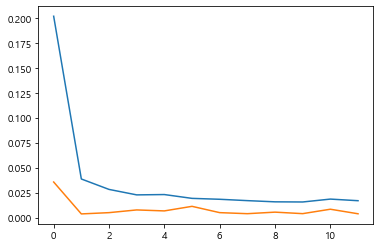

In [64]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label= 'val_loss')

In [65]:
pred = model.predict(X_test)

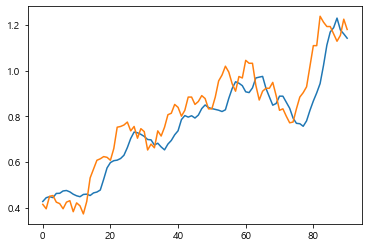

In [66]:
plt.plot(pred, label='pred')
plt.plot(y_test, label= 'y_test')

In [ ]:
# mf_df['2019_수익률'] = ''
# for x in mf_df['종목코드'].values : 
#     df = fdr.DataReader(x, '2019-01-01','2019-12-31') # 개별 종목 가격 데이터 호출
#     cum_ret = df.loc[df.index[-1], 'Close'] / df.loc[df.index[0],'Close'] -1  # 2019년도 누적 수익률 계산
#     mf_df.loc[mf_df['종목코드'] == x, '2019_수익률' ] = cum_ret  # 누적 수익률 저장
#     df = None

In [ ]:
# mf_df_rtn = pd.DataFrame()
# for x in mf_df['종목코드'].values : 
# #     print(x ,', ' , mf_df.loc[mf_df['종목코드'] == x, '종목명' ].values[0])
#     df = fdr.DataReader(x, '2019-01-01','2019-12-31') # 개별 종목 가격 데이터 호출
#     df['daily_rtn'] = df['Close'].pct_change(periods=1)
#     df['cum_rtn'] = (1+df['daily_rtn']).cumprod()
#     cum_ret = df.loc[df.index[-1],'cum_rtn']
#     mf_df.loc[mf_df['종목코드'] == x, '2019_수익률' ] = cum_ret  # 누적 수익률 저장
#     df = None

In [ ]:
# for ind,val in enumerate(mf_df['종목코드'].values) : 
#     # 가독성을 위해 종목명 추출.
#     code_name = mf_df.loc[mf_df['종목코드'] == val,'종목명'].values[0]
#     print(val, code_name)
#     df = fdr.DataReader(val, '2019-01-01','2019-12-31') # 개별 종목 가격 데이터 호출
#     if ind == 0 :
#         mf_df_rtn = pd.DataFrame(index=df.index) # 첫 번째 종목코드 인덱스 활용한 데이터프레임 생성
#     df['daily_rtn'] = df['Close'].pct_change(periods=1) # period 기간 차이만큼 변동율 계산
#     df['cum_rtn'] = (1+df['daily_rtn']).cumprod() # 누적 곱 계산
#     tmp = df.loc[:,['cum_rtn']].rename(columns={'cum_rtn':code_name}) # 가독성을 위한 컬럼명 변경
#     mf_df_rtn = mf_df_rtn.join(tmp,how='left') # 새로 계산된 누적 수익률 추가.
#     df = None # 데이터 프레임 초기화